1)The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.


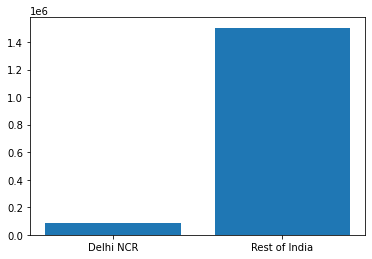

In [33]:
import requests
import json
import matplotlib.pyplot as plt
user_key='3754f0440b3026cde542ed69af9f499a' 
basic_api='https://developers.zomato.com/api/v2.1'
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key} 
params={'country_id': 1,} 
param={'user-key':'3754f0440b3026cde542ed69af9f499a'}
response=requests.get(basic_api+'/search',headers=header,params=params) 
py=response.json()
ncr=[60485, 6744, 5259, 10348, 3047]##after manually finding number of array of delhi ncr and inserting into the array
Delhi_ncr=sum(ncr)
rest_of_india=py['results_found']-sum(ncr)
arr=[Delhi_ncr,rest_of_india]
label=['Delhi NCR','Rest of India']
plt.bar(label,arr)
plt.show()


Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR 

In [95]:
import numpy as np
import pandas as pd

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=df[df['Country Code']==1]
df_del=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cuisine_list=list(df_ind['Cuisines'])
cuisine_list_del=list(df_del['Cuisines'])
ind=set()
ncr=set()
ind_c={}
del_c={}
for i in range(len(cuisine_list)):
    temp=cuisine_list[i]
    temp=temp.strip()
    temp1=temp.split(',')
    for i in  temp1:
        i=i.strip()
        ind.add(i)
        ind_c[i]=ind_c.get(i,0)+1
        

for i in range(len(cuisine_list_del)):
    temp=cuisine_list_del[i]
    temp=temp.strip()
    temp1=temp.split(',')
    
    for i in temp1:
        i=i.strip()
        ncr.add(i)
        del_c[i]=del_c.get(i,0)+1

ans=ind.difference(ncr)
a = sorted(ind_c.items(), key=lambda x: x[1],reverse=True)
b=sorted(del_c.items(), key=lambda x: x[1],reverse=True)
print('Top 10 Cuisine Served in India')
print('------------------------------')
print()
for i in a[0:10]:
    for j in i:
        print(j,end=" ")
        break
    print() 
print("Top 10 Cuisine served in Delhi NCR")
print("---------------------------------")
print()
for i in b[0:10]:
    for j in i:
        print(j,end=" ")
        break
    print() 
        

    


Top 10 Cuisine Served in India
------------------------------

North Indian 
Chinese 
Fast Food 
Mughlai 
Bakery 
Continental 
Italian 
South Indian 
Cafe 
Desserts 
Top 10 Cuisine served in Delhi NCR
---------------------------------

North Indian 
Chinese 
Fast Food 
Mughlai 
Bakery 
South Indian 
Continental 
Desserts 
Street Food 
Italian 


In [100]:
import numpy as np
import pandas as pd

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=df[df['Country Code']==1]
df_del=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cuisine_list=list(df_ind['Cuisines'])
cuisine_list_del=list(df_del['Cuisines'])
ind=set()
ncr=set()
ind_c={}
del_c={}
for i in range(len(cuisine_list)):
    temp=cuisine_list[i]
    temp=temp.strip()
    temp1=temp.split(',')
    for i in  temp1:
        i=i.strip()
        ind.add(i)
        ind_c[i]=ind_c.get(i,0)+1
        

for i in range(len(cuisine_list_del)):
    temp=cuisine_list_del[i]
    temp=temp.strip()
    temp1=temp.split(',')
    
    for i in temp1:
        i=i.strip()
        ncr.add(i)
        del_c[i]=del_c.get(i,0)+1

ans=ind.difference(ncr)
print('Cusines available in rest of India but Not delhi ncr are ')
print('-'*50)
for i in ans:
    print(i)

Cusines available in rest of India but Not delhi ncr are 
--------------------------------------------------
Malwani
German
Cajun
BBQ


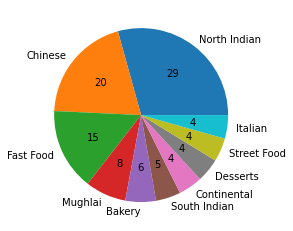

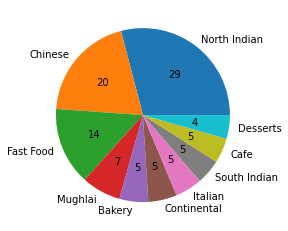

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=df[df['Country Code']==1]
df_del=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cuisine_list=list(df_ind['Cuisines'])
cuisine_list_del=list(df_del['Cuisines'])
ind=set()
ncr=set()
ind_c={}
del_c={}
for i in range(len(cuisine_list)):
    temp=cuisine_list[i]
    temp=temp.strip()
    temp1=temp.split(',')
    for i in  temp1:
        i=i.strip()
        ind.add(i)
        ind_c[i]=ind_c.get(i,0)+1
        

for i in range(len(cuisine_list_del)):
    temp=cuisine_list_del[i]
    temp=temp.strip()
    temp1=temp.split(',')
    
    for i in temp1:
        i=i.strip()
        ncr.add(i)
        del_c[i]=del_c.get(i,0)+1
a = sorted(ind_c.items(), key=lambda x: x[1],reverse=True)
b=sorted(del_c.items(), key=lambda x: x[1],reverse=True)
a_key=[]
a_val=[]
b_val=[]
b_key=[]
for i in a:
    for j in range(2):
        if(j==0):
            a_key.append(i[j])
        else:
            a_val.append(i[j])
for i in b:
    for j in range(2):
        if(j==0):
            b_key.append(i[j])
        else:
            b_val.append(i[j])
plt.figure(0)            
plt.pie(b_val[0:10],labels=b_key[0:10],autopct='%.f')
plt.figure(1)
plt.pie(a_val[0:10],labels=a_key[0:10],autopct='%.f')
plt.show()

From the above analysis of top 10 cuisine in Rest of India and Delhi NCR 
we can tell that street food is more go to cuisin for people in delhi as compared to rest of india.


2))User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1)Number of Votes given Restaurant
2)Restaurant serving more number of cuisines.
3)Average Cost of Restaurant
4)Restaurant serving some specific cuisines.

Showing analysis of votes vs rating
--------------------------------------------------


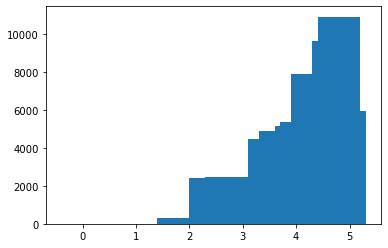

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df=df[df['Country Code']==1]
df_votes=df['Votes']
df_names=df['Restaurant Name']
df_votes=list(df_votes)
df_names=list(df_names)
df_rating=list(df_ind["Aggregate rating"])
restaurant_votes={}
for i in range(len(df_votes)):
    restaurant_votes[df_names[i]]=restaurant_votes.get(df_names[i],df_votes[i])
restaurant_votes= sorted(restaurant_votes.items(), key=lambda x: x[1],reverse=True)
restaurant_votes
print('Showing analysis of votes vs rating')
print("-"*50)
##for i in restaurant_votes:
  ##  for j in range(1):
      ##  print(i[j])
## also all the number of restaurants with decreasing order of votes are listed in retaurant_votes
plt.figure(20)
plt.bar(df_rating,df_votes)
plt.show()



Showing top 10 Restaurants with most Number of Votes
--------------------------------------------------


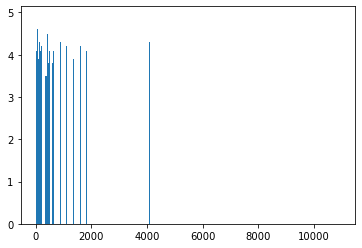

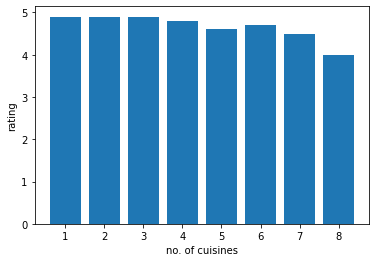

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=df[df['Country Code']==1]
##df_del=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cuisine_list=list(df_ind['Cuisines'])
##cuisine_list_del=list(df_del['Cuisines'])
df_restaurant=df['Restaurant Name']
df_restaurant=list(df_restaurant)
ind=set()
##ncr=set()
ind_c={}
val=[]
df_rating=list(df_ind["Aggregate rating"])
##del_c={}
for i in range(len(cuisine_list)):
    temp=cuisine_list[i]
    temp=temp.strip()
    temp1=temp.split(',')
    ind_c[df_restaurant[i]]=ind_c.get(df_restaurant[i],len(temp1))
    val.append(ind_c[df_restaurant[i]])
plt.bar(val,df_rating)
plt.xlabel('no. of cuisines')
plt.ylabel('rating')
plt.show()



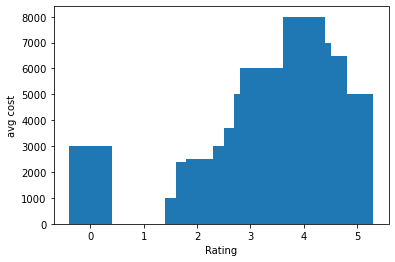

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=df[df['Country Code']==1]
##df_del=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cuisine_list=list(df_ind['Cuisines'])
##cuisine_list_del=list(df_del['Cuisines'])
df_restaurant=df['Restaurant Name']
df_restaurant=list(df_restaurant)
ind=set()
##ncr=set()
ind_c={}
val=[]
df_rating=list(df_ind["Aggregate rating"])
##del_c={}
df_avgcost=list(df_ind['Average Cost for two'])
plt.bar(df_rating,df_avgcost)
plt.xlabel('Rating')
plt.ylabel('avg cost')
plt.show()


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dr = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=dr[dr['Country Code']==1]
indexes=df_ind['Locality'].value_counts().index
locality=[]
weighted_val=[]

##df_ind[df_ind['Locality']==indexes[0]]
for i in indexes:
    temp=df_ind[df_ind['Locality']==i]
    temp1=temp.copy()
    temp1['new']=temp1['Votes']*temp1['Aggregate rating']
    total_n=temp1['new'].sum()
    total_v=temp1['Votes'].sum()
    weight=round(total_n/total_v,2)
    weighted_val.append(weight)
dict_locality={}
for i in range(len(indexes)):
    dict_locality[indexes[i]]=dict_locality.get(indexes[i],weighted_val[i])
dict_locality = sorted(dict_locality.items(), key=lambda x: x[1],reverse=True)
dict_locality
print('Top 10 Restaurant with more weighted rating in India')
print('--'*30)
for i in dict_locality[0:10]:
    for j in range(1):
        print(i[j])


<ipython-input-191-607bb208849b>:18: RuntimeWarning: invalid value encountered in double_scalars
  weight=round(total_n/total_v,2)


Top 10 Restaurant with more weighted rating in India
------------------------------------------------------------
Pandara Road Market
Gomti Nagar
Chawri Bazar
Sector 16
Kailash Colony
Lawrence Road
Khan Market
Tagore Garden
Epicuria Food Mall, Nehru Place
Lodhi Road


## Visualisation
Plot the bar graph top 15 restaurants have a maximum number of outlets.
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
Plot the bar graph top 10 restaurants in the data with the highest number of votes.
Plot the pie graph of top 10 cuisines present in restaurants in the USA.
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.# 

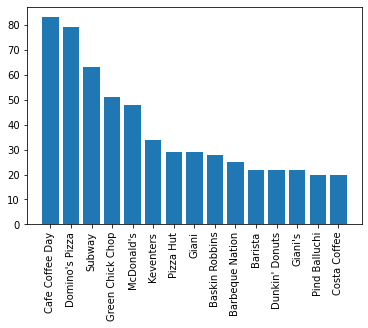

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dr = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=dr[dr['Country Code']==1]
val=df_ind['Restaurant Name'].value_counts().values
restaurant=df_ind['Restaurant Name'].value_counts().index
val=val[0:15]
restaurant=restaurant[0:15]
plt.bar(restaurant,val)
plt.xticks(rotation=90,horizontalalignment='center')
plt.show()


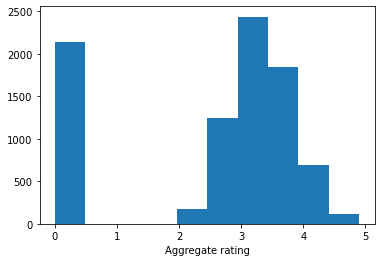

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dr = pd.read_csv('zomato.csv', encoding='latin-1')
df_ind=dr[dr['Country Code']==1]
new=df_ind['Aggregate rating']
plt.hist(new)
plt.xlabel('Aggregate rating')
plt.show()


## Top 10 restaurants according to their votes

Showing analysis of votes vs rating
--------------------------------------------------


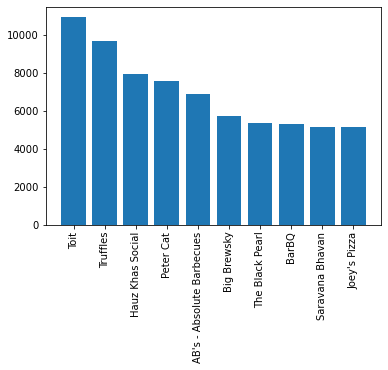

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df=df[df['Country Code']==1]
df_votes=df['Votes']
df_names=df['Restaurant Name']
df_votes=list(df_votes)
df_names=list(df_names)
df_rating=list(df_ind["Aggregate rating"])
restaurant_votes={}
for i in range(len(df_votes)):
    restaurant_votes[df_names[i]]=restaurant_votes.get(df_names[i],df_votes[i])
restaurant_votes= sorted(restaurant_votes.items(), key=lambda x: x[1],reverse=True)
restaurant_votes
print('Showing analysis of votes vs rating')
print("-"*50)
res=[]
val=[]

for i in restaurant_votes[0:10]:
    for j in range(2):
        if(j==0):
            res.append(i[j])
        else:
            val.append(i[j])
plt.bar(res,val)
plt.xticks(rotation=90,horizontalalignment='center')
plt.show()



## (4)Plot the pie graph of top 10 cuisines present in restaurants in the USA

C:\Users\Computer\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


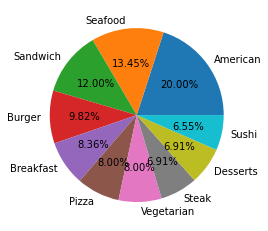

In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('zomato.csv', encoding='latin-1')
df=iris.copy()
total=[]
final_dict={}
ef=df[df['Country Code']==216]
ef.Cuisines.fillna('',inplace=True)
tf=ef.copy()
final_cuisine=[]
final_count=[]
def f(s):
    if s!='':
        val=s.split(',')
        new=[]
        if len(val)==1:
            return val[0].strip()
        else:
            for i in val:
                new.append(i.strip())
            return new
    return 0       
df['total_Cuisines']=tf.Cuisines.apply(f)
new=df.total_Cuisines.value_counts()
new_val=new.index
for i in new_val:
    if i==0:
        continue
    if type(i)==str:
        total.append(i)
    else:
        for j in i:
            total.append(j)
for i in total:
    if i in final_dict:
        final_dict[i]+=1
    else:
        final_dict[i]=1
for k in range(10):
    maxi=-99999
    for i in final_dict:
        if final_dict[i]>maxi:
            val=i
            maxi=final_dict[i]
    final_cuisine.append(val)
    final_count.append(maxi)
    final_dict[val]=-99999999
plt.pie(final_count,labels=final_cuisine,autopct='%.2f%%')
plt.show()

## (5)Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

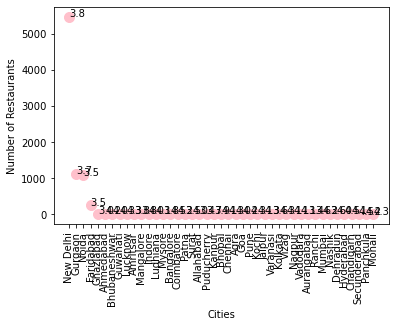

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('zomato.csv', encoding='latin-1')
df=iris.copy()
locality=[]
ef=df[df['Country Code']==1]
new=ef.City.value_counts()
Weighted_Restaurant_Rating=[]
res_name=new.index
no_of_res=new.values
for i in res_name:
    locality.append(i)
    tf=df[df.City==i]
    af=tf.copy()
    af['new_col']=tf['Votes']*tf['Aggregate rating']
    total=af.new_col.sum()
    count=af.Votes.sum()
    weighted=total/count
    Weighted_Restaurant_Rating.append(weighted)
Weighted_Restaurant_Rating = [ round(elem, 1) for elem in Weighted_Restaurant_Rating]
plt.scatter(res_name,no_of_res,s=100,color='pink')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
for i in range(len(Weighted_Restaurant_Rating)):
    plt.text(res_name[i],no_of_res[i],Weighted_Restaurant_Rating[i])
plt.show()